Objectives of this code 

- assign probe molecule 
- import reference molecules from DeepFMPO v3D molecules.smi file 

- the molecules will be presented visually 

- similarities will be calculated via Gasteiger and MMFF calculations 

- table presentation (in this order):
    - list of reference molecules 
    - shape similarity 
    - charges similarity 
    - average value between shape and charges similarity 
    - rank of shape similarity 
    - rank of charges similarity 
    - rank of average values 

- scatter plots to show correlation between:
    - shape vs average via Gasteiger 
    - shape vs average via MMFF 
    - average values calculated by Gasteiger vs MMFF 
    - rank of shape similarity Gasteiger vs MMFF 
    - rank of charges similarity Gasteiger vs MMFF 
    - rank of average values Gasteiger vs MMFF 

- Correlation calculations for each plot:
    - correlation coefficient (R2 value)
    - Spearman rank correlation 



In [14]:
# Functions and libraries imported for this code 

# prerequisites: RDKit, py3Dmol, small espsim package 

from rdkit import Chem # for editing the molecules from smiles (1D) to 2D
#from rdkit.Chem import AllChem # what is this used for ???
from rdkit.Chem import Draw # for drawing the molecules 
#from rdkit.Chem.Draw import IPythonConsole - ?????
import py3Dmol 
from ipywidgets import interact, interactive, fixed # For interactive display of conformers
from espsim import EmbedAlignConstrainedScore, EmbedAlignScore, ConstrainedEmbedMultipleConfs, GetEspSim, GetShapeSim # for shape and charge calculations 
import pandas as pd # For opening molecules file 
import matplotlib.pyplot as plt # For making scatter plots 
import numpy 
import numpy as np # editing plots and coefficient correlation 
import scipy.stats as ss # For ranking data 
from scipy.stats import spearmanr # Spearman rank 

In [ ]:
# Probe molecule 
prbSmile='C(C(C(=O)O)O)O'
prbMol=Chem.AddHs(Chem.MolFromSmiles(prbSmile)) # Adding H to the molecules since the Smiles do no include H

# Reference molecules 
header_list=["smiles"] # making the column 
refSmiles = pd.read_csv('/Users/yada/Documents/UCL/DissertaC(tion/deepFMPOv3D-main/Data/molecules.smi',header=None,names=header_list) # Opening data file 
refMols=[Chem.AddHs(Chem.MolFromSmiles(x)) for x in refSmiles["smiles"]] # for each of the molecules in refSmiles it is changing smiles in molecule and adding Hs that are missing 



In [5]:
# GASTEIGER 

# Calling functions for calculating partial charges similarity with the faster option 
simShape_Gas,simEsp_Gas=EmbedAlignScore(prbMol,refMols,getBestESP=True,prbNumConfs = 10,refNumConfs = 10,prbCharge = [],refCharges = [],metric = "carbo",integrate = "gauss",partialCharges = "gasteiger") 

# Calculating average 
avrlist_Gas=[] # Creating empty list as the other values in the table are lists 
for i in range(len(refSmiles)): # going through the length of refSmiles starting from 0 when it counts 
    avr=(simShape_Gas[i]+simEsp_Gas[i])/2
    avrlist_Gas.append(avr) # Adding each value into the list 

# Ranking 
rank_Gas_Shape = ss.rankdata(simShape_Gas) # Ranking shape 
rank_Gas_ESP = ss.rankdata (simEsp_Gas) # Ranking ESP
rank_Gas_avr = ss.rankdata(avrlist_Gas) # Ranking average values 

print('%68s %8s %7s %10s %10s %8s %10s' % ("Reference","Shape","ESP","Average","Rank Shape","Rank ESP","Rank Average")) # Column headings 
for i in range(len(refSmiles)): #going through the length of refSmiles starting from 0 when it counts 
    print('%68s %8.2f %8.2f %8.2f %8.2f %8.2f %8.2f' % (refSmiles["smiles"][i],simShape_Gas[i],simEsp_Gas[i],avr,rank_Gas_Shape[i],rank_Gas_ESP[i],rank_Gas_avr[i]))

  

hello


RDKit ERROR: [02:56:48] UFFTYPER: Unrecognized charge state for atom: 16
[02:56:48] UFFTYPER: Unrecognized charge state for atom: 16
RDKit ERROR: [02:59:18] UFFTYPER: Unrecognized charge state for atom: 17
[02:59:18] UFFTYPER: Unrecognized charge state for atom: 17
RDKit ERROR: [02:59:52] UFFTYPER: Unrecognized charge state for atom: 16
[02:59:52] UFFTYPER: Unrecognized charge state for atom: 16


                                                           Reference    Shape     ESP    Average Rank Shape Rank ESP Rank Average
    S(=O)(=O)(N)c1ccc(N/N=C/2\C(=O)Nc3c\2c(/C=C/c2ccc(O)cc2)ccc3)cc1     0.22     0.44     0.34   294.00   537.00   439.00
    S(=O)(=O)(Nc1cc(-c2[nH]nc(Nc3ccc(S(=O)(=O)N)cc3)c2)ccc1)c1ccccc1     0.21     0.42     0.34   144.00   445.00   308.00
                           O=Nc1c(-c2c(O)[nH]c3c2cccc3)[nH]c2c1cccc2     0.35     0.55     0.34  1019.00   935.00  1015.00
            O=C1NC(=O)c2c3c4n(c5c3cccc5)C3OC(n5c4c(c4c5cccc4)c12)CC3     0.25     0.38     0.34   606.00   318.00   354.00
                Brc1ccc(CC(=O)Nc2n[nH]c3c2cc(N2S(=O)(=O)CCC2)cc3)cc1     0.24     0.57     0.34   473.00   965.00   908.00
                 Clc1cc(Nc2nc(N3[C@@H](CO)CCC3)nc3n(C(C)C)cnc23)ccc1     0.25     0.41     0.34   600.00   436.00   456.00
                        OC[C@H](Nc1nc(NCc2ccccc2)c2ncn(C(C)C)c2n1)CC     0.26     0.54     0.34   635.00   900.00   868.00
         

In [33]:
# MMFF 

simShape_mmff,simEsp_mmff=EmbedAlignScore(prbMol,refMols,getBestESP=True,prbNumConfs = 10,refNumConfs = 10,prbCharge = [],refCharges = [],metric = "carbo",integrate = "gauss",partialCharges = "mmff") 

avrlist_mmff=[]
for i in range(len(refSmiles)): 
    avr=(simShape_mmff[i]+simEsp_mmff[i])/2
    avrlist_mmff.append(avr)

rank_mmff_avr = ss.rankdata(avrlist_mmff)
rank_mmff_Shape = ss.rankdata(simShape_mmff)
rank_mmff_ESP = ss.rankdata(simEsp_mmff)

print('%68s %8s %7s %10s %10s %8s %10s' % ("Reference","Shape","ESP","Average","Rank Shape","Rank ESP","Rank Average"))
for i in range(len(refSmiles)): 
    print('%68s %8.2f %8.2f %8.2f %8.2f %8.2f %8.2f' % (refSmiles["smiles"][i],simShape_mmff[i],simEsp_mmff[i],avr,rank_mmff_Shape[i],rank_mmff_ESP[i],rank_mmff_avr[i]))
  
    

hello


RDKit ERROR: [03:15:55] UFFTYPER: Unrecognized charge state for atom: 16
[03:15:55] UFFTYPER: Unrecognized charge state for atom: 16
RDKit ERROR: [03:18:22] UFFTYPER: Unrecognized charge state for atom: 17
[03:18:22] UFFTYPER: Unrecognized charge state for atom: 17
RDKit ERROR: [03:18:58] UFFTYPER: Unrecognized charge state for atom: 16
[03:18:58] UFFTYPER: Unrecognized charge state for atom: 16


MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger charges.
MMFF charges not available for the input molecule, defaulting to Gasteiger c

In [ ]:
print (len(simEsp_Gas))
print (len(simEsp_mmff))

In [7]:
# Correlation coefficient function  

def CorrCoef (x,y):
    corr_matrix = numpy.corrcoef(x,y)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    print ('Correlation coeffcient = %.3f' % R_sq)
    return


In [8]:
# Spearmans rank Function 

def SpearRank (x,y):
	# Calculating correlation coefficient 
	coef, p = spearmanr(x,y)
	print('Spearmans correlation coefficient: %.3f' % coef)
	

# Running the example calculates the Spearman’s correlation coefficient between the two variables in the test dataset.

# The p-value is close to zero, which means that the likelihood of observing the data given that the samples are uncorrelated is very unlikely 
# 95% confidence of rejecting hypothesis 



In [9]:
def RegLine (x,y):
    # Fit linear regression via least squares with numpy.polyfit
    # It returns an slope (b) and intercept (a)
    # deg=1 means linear fit (i.e. polynomial of degree 1)
    b, a = np.polyfit(x,y, deg=1)
    # Create sequence of number 
    xseq = np.linspace(0, 1)
    # Plot regression line
    ax.plot(xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
    return 

PLOTS FOR SIMILARITY SCORES - GASTEIGER

Correlation coeffcient = 0.384
Spearmans correlation coefficient: 0.575


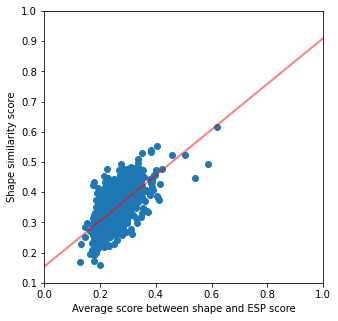

In [34]:

# Correlation calculations shape vs avr Gasteiger 

# Setting size of plot 
fig, ax = plt.subplots(figsize = (5,5)) 
# Setting axis ranges 
plt.xlim(0,1) # Similarity calculations ranges from 0-1, the closer to 1 the higher the similarity 
plt.ylim(0.1)
#Setting axis labels and plot title 
plt.xlabel("Average score between shape and ESP score")
plt.ylabel("Shape similarity score")
# this is the order that you have to follow 
# important to set up the axis labels and ranges before presenting the plot 
ax.scatter (simShape_Gas, avrlist_Gas ) 

# Regression line 
RegLine(simShape_Gas, avrlist_Gas)

# Correlation coefficient 
CorrCoef(simShape_Gas, avrlist_Gas)

# Spearman rank 
SpearRank(simShape_Gas, avrlist_Gas)


Correlation coeffcient = 0.067
Spearmans correlation coefficient: 0.264


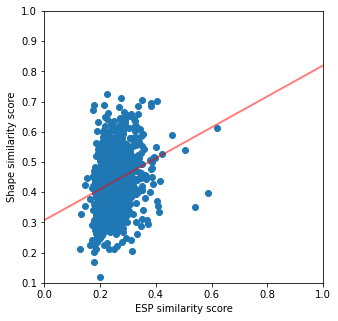

In [29]:
# Shape scores vs ESP scores 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,1)
plt.ylim(0.1)
plt.xlabel("ESP similarity score")
plt.ylabel("Shape similarity score")
ax.scatter (simShape_Gas, simEsp_Gas ) 

RegLine(simShape_Gas, simEsp_Gas)
CorrCoef(simShape_Gas, simEsp_Gas)
SpearRank(simShape_Gas, simEsp_Gas)

Correlation coeffcient = 0.384
Spearmans correlation coefficient: 0.575


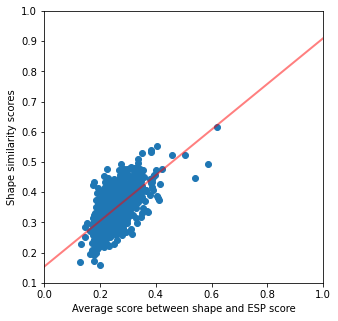

In [30]:
# Shape scores vs avr scores 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,1)
plt.ylim(0.1)
plt.xlabel("Average score between shape and ESP score")
plt.ylabel("Shape similarity scores")
ax.scatter (simShape_Gas, avrlist_Gas ) 

RegLine(simShape_Gas, avrlist_Gas)
CorrCoef(simShape_Gas, avrlist_Gas)
SpearRank(simShape_Gas, avrlist_Gas)

Correlation coeffcient = 0.843
Spearmans correlation coefficient: 0.924


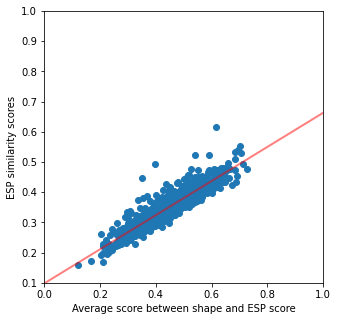

In [31]:
# ESP scores vs avr scores 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,1)
plt.ylim(0.1)
plt.xlabel("Average score between shape and ESP score")
plt.ylabel("ESP similarity scores")
ax.scatter (simEsp_Gas, avrlist_Gas ) 

RegLine(simEsp_Gas, avrlist_Gas)
CorrCoef(simEsp_Gas, avrlist_Gas)
SpearRank(simEsp_Gas, avrlist_Gas)

PLOTS FOR SCORE RANKINGS BY GASTEIGER 

Correlation coeffcient = 0.070
Spearmans correlation coefficient: 0.264


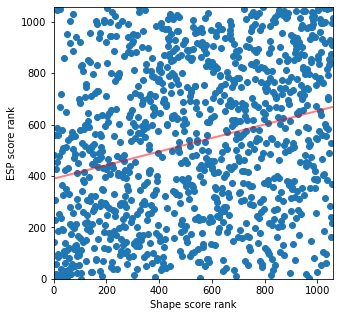

In [25]:
# Shape rank vs ESP rank 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("Shape score rank")
plt.ylabel("ESP score rank")
ax.scatter (rank_Gas_Shape, rank_Gas_ESP ) 

b, a = np.polyfit(rank_Gas_Shape, rank_Gas_ESP, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(rank_Gas_Shape, rank_Gas_ESP)
SpearRank(rank_Gas_Shape, rank_Gas_ESP)



Correlation coeffcient = 0.331
Spearmans correlation coefficient: 0.575


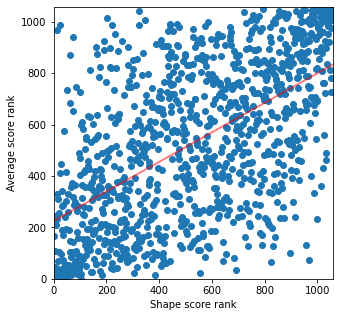

In [26]:
# Shape rank vs avr rank 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("Shape score rank")
plt.ylabel("Average score rank")
ax.scatter (rank_Gas_Shape, rank_Gas_avr ) 

b, a = np.polyfit(rank_Gas_Shape, rank_Gas_avr, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(rank_Gas_Shape, rank_Gas_avr)
SpearRank(rank_Gas_Shape, rank_Gas_avr)

Correlation coeffcient = 0.853
Spearmans correlation coefficient: 0.924


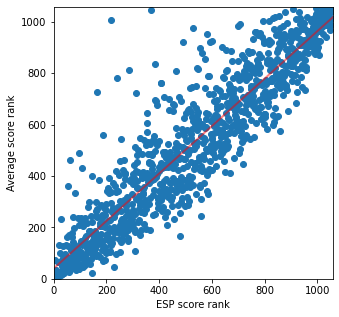

In [27]:
# EPS rank vs avr rank 

fig, ax = plt.subplots(figsize = (5,5)) 
plt.xlim(0,len(refSmiles))
plt.ylim(0,len(refSmiles))
plt.xlabel("ESP score rank")
plt.ylabel("Average score rank")
ax.scatter (rank_Gas_ESP, rank_Gas_avr ) 

b, a = np.polyfit(rank_Gas_ESP, rank_Gas_avr, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)
CorrCoef(rank_Gas_ESP, rank_Gas_avr)
SpearRank(rank_Gas_ESP, rank_Gas_avr)

PLOTS FOR CHAPTER 7.2 COMPARING PARTIAL CHARGES

COMPARING SIMILARITY SCORES BETWEEN GASTEIGER AND MMFF

Correlation coeffcient = 0.925
Spearmans correlation coefficient: 0.978


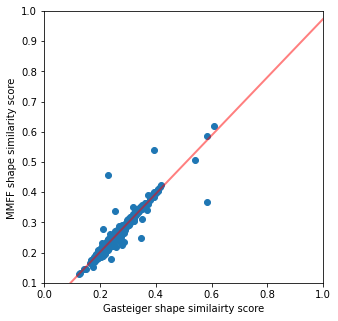

In [35]:
# Shape similarity scores Gasteiger vs MMFF 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,1)
plt.ylim(0.1)
plt.xlabel("Gasteiger shape similairty score")
plt.ylabel("MMFF shape similarity score ")

ax.scatter (simShape_mmff, simShape_Gas) 

RegLine(simShape_mmff, simShape_Gas)
CorrCoef(simShape_mmff, simShape_Gas)
SpearRank(simShape_mmff, simShape_Gas)


Correlation coeffcient = 0.237
Spearmans correlation coefficient: 0.464


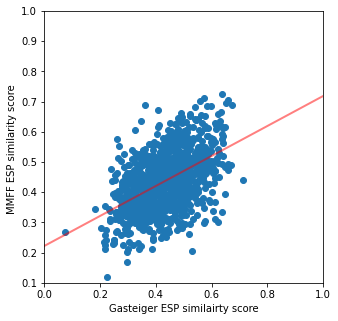

In [36]:
# ESP similarity scores Gasteiger vs MMFF 

fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,1)
plt.ylim(0.1)
plt.xlabel("Gasteiger ESP similairty score")
plt.ylabel("MMFF ESP similarity score ")

ax.scatter (simEsp_mmff, simEsp_Gas) 

RegLine(simEsp_mmff, simEsp_Gas)
CorrCoef(simEsp_mmff, simEsp_Gas)
SpearRank(simEsp_mmff, simEsp_Gas)

Correlation coeffcient = 0.424
Spearmans correlation coefficient: 0.608


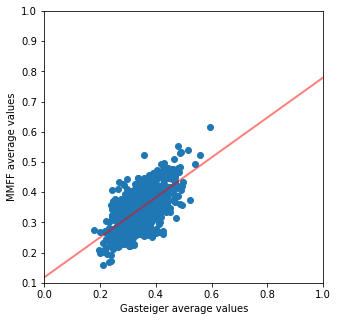

In [37]:
# Average scores Gasteiger vs MMFF 

# Plot 
fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,1)
plt.ylim(0.1)
plt.xlabel("Gasteiger average values")
plt.ylabel("MMFF average values")

ax.scatter (avrlist_mmff, avrlist_Gas ) 

RegLine(avrlist_mmff, avrlist_Gas)
CorrCoef(avrlist_mmff, avrlist_Gas)
SpearRank(avrlist_mmff, avrlist_Gas)


COMPARING RANKINGS BETWEEN GASTEIGER AND MMFF

Correlation coeffcient = 0.956
Spearmans correlation coefficient: 0.978


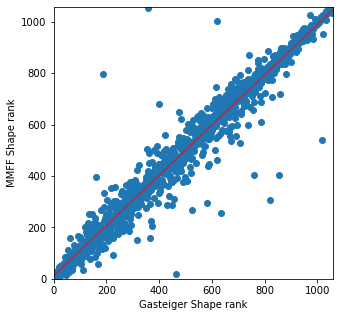

In [39]:
# Shape ranks Gasteiger vs MMFF 
# expected to be 1 because neither calculated the shape since they are only responsible for calculating partial charges 

# Plot 
fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,len(rank_Gas_Shape)) # for ranking the axis follows the list of the data 
plt.ylim(0,len(rank_mmff_Shape))
plt.xlabel("Gasteiger Shape rank")
plt.ylabel("MMFF Shape rank")

ax.scatter (rank_mmff_Shape,rank_Gas_Shape) 


b, a = np.polyfit(rank_mmff_Shape,rank_Gas_Shape, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)


CorrCoef(rank_mmff_Shape,rank_Gas_Shape)
SpearRank(rank_mmff_Shape,rank_Gas_Shape)


Correlation coeffcient = 0.215
Spearmans correlation coefficient: 0.464


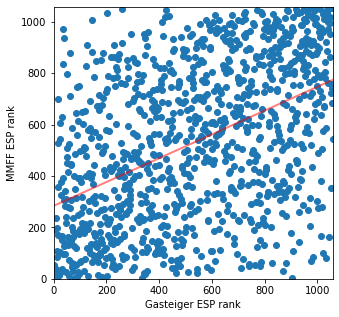

In [40]:
# ESP ranks Gasteiger vs MMFF 

# plot
fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,len(rank_Gas_ESP))
plt.ylim(0,len(rank_mmff_ESP))
plt.xlabel("Gasteiger ESP rank")
plt.ylabel("MMFF ESP rank")

ax.scatter (rank_mmff_ESP,rank_Gas_ESP) 

b, a = np.polyfit(rank_mmff_ESP,rank_Gas_ESP, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

CorrCoef(rank_mmff_ESP,rank_Gas_ESP)
SpearRank(rank_mmff_ESP,rank_Gas_ESP)


Correlation coeffcient = 0.370
Spearmans correlation coefficient: 0.608


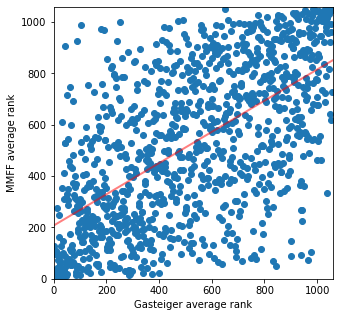

In [41]:
# Average ranks Gasteiger vs MMFF 

# plot
fig, ax = plt.subplots(figsize = (5,5)) 

plt.xlim(0,len(rank_Gas_avr)+1) # +1 for better presentation
plt.ylim(0,len(rank_mmff_avr)+1)
plt.xlabel("Gasteiger average rank")
plt.ylabel("MMFF average rank")

ax.scatter (rank_mmff_avr,rank_Gas_avr) 

b, a = np.polyfit(rank_mmff_avr,rank_Gas_avr, deg=1)
xseq = np.linspace(0, len(refSmiles))
ax.plot (xseq, a + b * xseq, color="red", alpha=0.5, lw=2)

CorrCoef(rank_mmff_avr,rank_Gas_avr)
SpearRank(rank_mmff_avr,rank_Gas_avr)